![header](header.png)

# Procesamiento Digital de Señales en Sistemas Embebidos

---

# TP5: Procemamiento mediante ML *(parte 2)*

## Introducción

La técnica de la ventana deslizante es un método para iterar sobre una secuencia de datos, que generalmente se usa en el contexto del aprendizaje automático y el procesamiento de imágenes. Implica dividir los datos en ventanas superpuestas de un tamaño fijo y procesar cada ventana de forma independiente. De esta manera, reduce la complejidad del algoritmo utilizado.

Por ejemplo, considere una secuencia de puntos de datos que representan los valores de una serie de tiempo durante un período de tiempo. Una ventana deslizante de tamaño 3 implicaría dividir los datos en ventanas superpuestas de 3 puntos consecutivos y procesar cada ventana de forma independiente. La primera ventana constaría de los primeros 3 puntos, la segunda ventana constaría del segundo, tercero y cuarto puntos, y así sucesivamente.

La técnica de ventana deslizante se usa a menudo para extraer características de una secuencia de datos, como para la clasificación de imágenes o la detección de objetos. Puede ser útil en situaciones donde el contexto o la relación entre puntos de datos adyacentes es importante, ya que la superposición entre ventanas permite conservar el contexto.

![pan-tompkins](win.png)

La técnica de ventana deslizante se usa a menudo cuando necesita procesar una secuencia de datos, como una serie temporal, una imagen o una señal, y desea conservar el contexto o la relación entre puntos de datos adyacentes. Algunos escenarios comunes en los que se puede usar la técnica de la ventana deslizante incluyen:

1. Clasificación de imágenes: la técnica de ventana deslizante se puede utilizar para extraer características de una imagen dividiendo la imagen en ventanas superpuestas y procesando cada ventana de forma independiente. Esto le permite extraer características como bordes o texturas, mientras conserva la relación espacial entre las diferentes partes de la imagen.
2. Detección de objetos: la técnica de ventana deslizante se puede utilizar para escanear una imagen e identificar objetos mediante la búsqueda de patrones que coincidan con una plantilla de objeto predefinida. Esta puede ser una forma eficiente de buscar objetos en una imagen, ya que puede ajustar el tamaño y la superposición de la ventana deslizante para controlar el equilibrio entre la precisión y la eficiencia computacional.
3. Análisis de series temporales: la técnica de la ventana deslizante se puede utilizar para analizar una serie temporal dividiendo los datos en ventanas superpuestas y procesando cada ventana de forma independiente. Esto puede resultar útil para tareas como la previsión o "forecasting", en las que desea tener en cuenta la relación entre puntos de datos adyacentes.
4. Procesamiento de señales: la técnica de ventana deslizante se puede utilizar para analizar una señal, como una señal de audio o video, dividiendo la señal en ventanas superpuestas y procesando cada ventana de forma independiente. Esto puede resultar útil para tareas como la extracción de características o la reducción de ruido, en las que desea conservar la relación entre puntos de datos adyacentes.

In [1]:
try:
    import micromlgen
except:
    !pip install micromlgen

Defaulting to user installation because normal site-packages is not writeable
  Using cached micromlgen-1.1.28.tar.gz (12 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32166 sha256=4cbd08500eb9585f5ed8ea981c2cf40143d0743c1ef391f83caac57bd3b80b29
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\32\5f\6b\97820b0333e964d677ec994f6d7e88ee823acf17d4c7582274
Successfully built micromlgen


In [2]:
# Incluir librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import recall_score
from micromlgen import port
from sklearn import tree
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import process_code
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import seaborn as sns
# Set seed for experiment reproducibility
seed = 1
np.random.seed(seed)
plt.rcParams["figure.figsize"] = (10, 5)

In [3]:
"""
https://eloquentarduino.github.io/2021/06/covid-patient-health-assessing-device-using-sliding-window/
Generación de datos
"""
# Number of sample datapoints
SAMPLES = 1800

# Generate a uniformly distributed set of random numbers in the range from
minutes = np.random.uniform(low=0, high=1500, size=SAMPLES).astype(np.uint32)

# Stable Condition
# SpO2 Range = 96 to 100
#Respiratory Rate = 12 to 20
#Pulse = 51 to 90
#Body Temperature = 96 to 100

StableSpO2=np.random.uniform(low=96, high=100, size=SAMPLES).astype(np.uint8)
StableRR=np.random.uniform(low=12, high=20, size=SAMPLES).astype(np.uint8)
StablePulse=np.random.uniform(low=51, high=90, size=SAMPLES).astype(np.uint8)
StableTemp=np.random.uniform(low=96, high=100, size=SAMPLES).astype(np.float32)



# Mild Condition
# SpO2 Range = 93 to 95
#Respiratory Rate = 21 to 24
#Pulse = 41 to 50
#Body Temperature = 100 to 102

MildSpO2=np.random.uniform(low=93, high=95, size=SAMPLES).astype(np.uint8)
MildRR=np.random.uniform(low=21, high=24, size=SAMPLES).astype(np.uint8)
MildPulse=np.random.uniform(low=41, high=50, size=SAMPLES).astype(np.uint8)
MildTemp=np.random.uniform(low=100, high=102, size=SAMPLES).astype(np.float32)


# Moderate Condition
# SpO2 Range = 90 to 92
#Respiratory Rate = 25 to 30
#Pulse = 41 to 50
#Body Temperature = 102 to 106


ModerateSpO2=np.random.uniform(low=90, high=92, size=SAMPLES).astype(np.uint8)
ModerateRR=np.random.uniform(low=25, high=30, size=SAMPLES).astype(np.uint8)
ModeratePulse=np.random.uniform(low=41, high=50, size=SAMPLES).astype(np.uint8)
ModerateTemp=np.random.uniform(low=102, high=106, size=SAMPLES).astype(np.float32)


# Critical Condition
# SpO2 Range = 80 to 90
#Respiratory Rate = 30 to 40
#Pulse = 30 to 40
#Body Temperature = 102 to 106


CriticalSpO2=np.random.uniform(low=80, high=90, size=SAMPLES).astype(np.uint8)
CriticalRR=np.random.uniform(low=30, high=40, size=SAMPLES).astype(np.uint8)
CriticalPulse=np.random.uniform(low=30, high=40, size=SAMPLES).astype(np.uint8)
CriticalTemp=np.random.uniform(low=102, high=106, size=SAMPLES).astype(np.float32)


In [4]:
"""
Formateo como pd.DataFrame
"""

stable = pd.DataFrame(list(zip(StableSpO2, StableRR, StablePulse, StableTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])
mild = pd.DataFrame(list(zip(MildSpO2, MildRR, MildPulse, MildTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])
moderate = pd.DataFrame(list(zip(ModerateSpO2, ModerateRR, ModeratePulse, ModerateTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])
critical = pd.DataFrame(list(zip(CriticalSpO2, CriticalRR, CriticalPulse, CriticalTemp)), columns=['spo2', 'rr', 'pulse', 'temp'])

<Axes: title={'center': 'Stable'}>

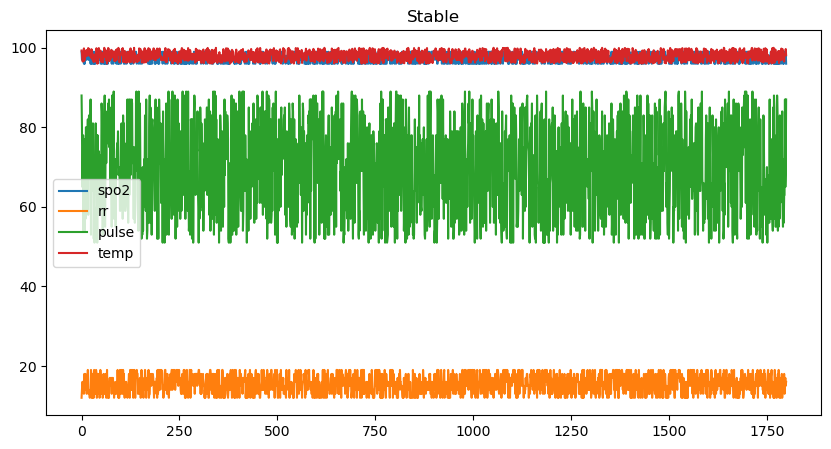

In [5]:
stable.plot(title='Stable')

<Axes: title={'center': 'Mild'}>

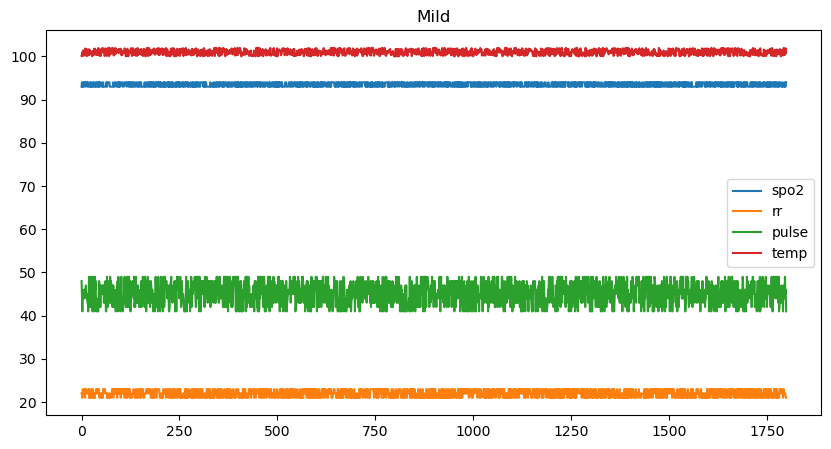

In [6]:
mild.plot(title='Mild')

<Axes: title={'center': 'Moderate'}>

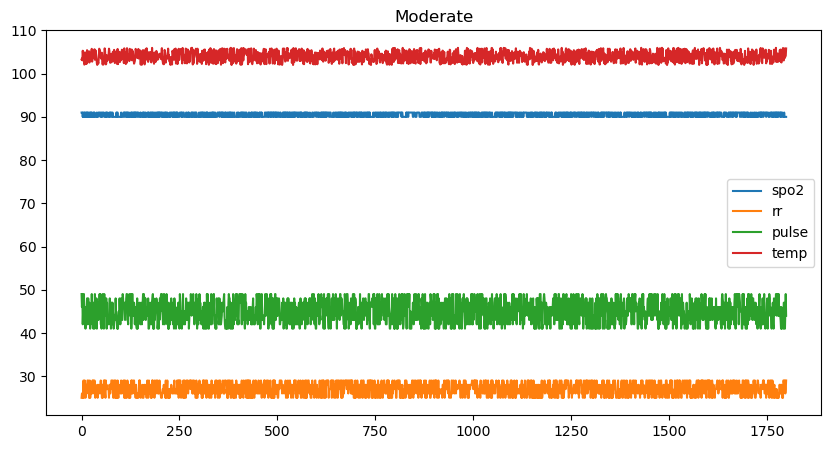

In [7]:
moderate.plot(title='Moderate')

<Axes: title={'center': 'Critical'}>

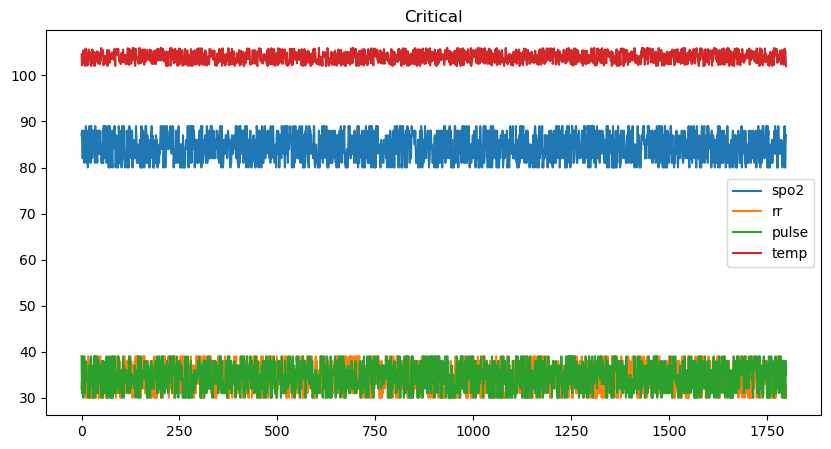

In [8]:
critical.plot(title='Critical')

In [9]:
"""
Formateo de pd.DataFrames como matrices numpy para pre-procesamiento/entrenamiento
"""
X = np.vstack((stable.to_numpy(), mild.to_numpy(), moderate.to_numpy(), critical.to_numpy()))
y = np.concatenate([i * np.ones(SAMPLES) for i in range(4)])

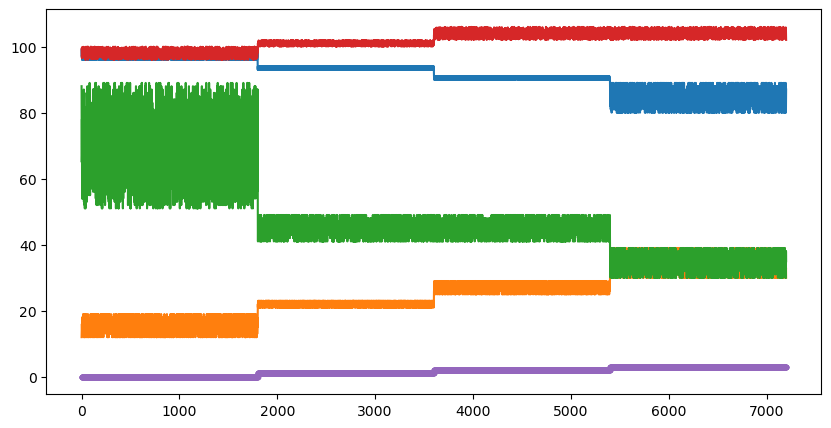

In [10]:
plt.plot(X)
plt.plot(y, '.')

In [11]:
"""
Aplicación de la ventana deslizante
"""
try:
    import embedded_window
except:
    !pip install embedded_window
    
from embedded_window import Window

window = Window(length=20, shift=5)

# X_w holds the input arranged in windows. Shape is (-1, length, X.shape[1])
# features holds the extracted features for each window (min/max/mean/std...)
# y_w holds the most frequent label inside each window 
X_w, features, y_w = window.fit_transform(X, y)

print('X_w.shape     ', X_w.shape)
print('features.shape', features.shape)
print('y_w.shape     ', y_w.shape)

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for embedded_window: filename=embedded_window-0.0.2-py3-none-any.whl size=3407 sha256=ec6d0a13d95bfa3113ec47971ff286c173e290952ec56e7e66f91c54bf759546
  Stored in directory: c:\users\pc\appdata\local\pip\cache\wheels\f9\24\b4\7329467b59595827b1b4b48d3826ddc4327e6d443b485fc93c
Successfully built embedded_window
X_w.shape      (1437, 20, 4)
features.shape (1437, 32)
y_w.shape      (1437,)


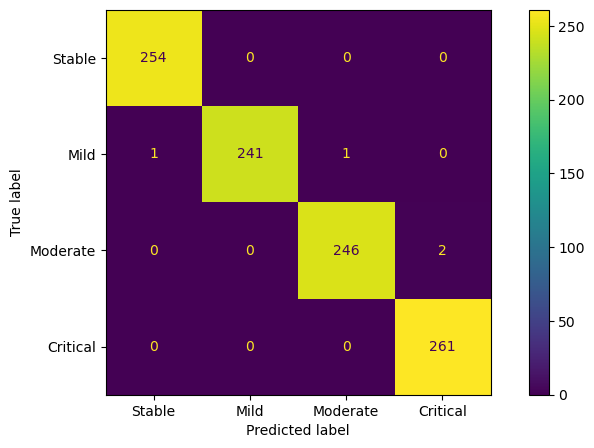

In [12]:
#Separamos el dataset y el vector de salida en partes iguales para el entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(features, y_w, test_size=0.7)

#Creamos un modelo de tipo Random Forrest y le pasamos la partición del dataset y salida
# de testeo
clf = RandomForestClassifier(n_estimators=10, max_features= 10, bootstrap=False).fit(X_train, y_train)

#Utilizo el modelo entrenado para obtener la predicción de las salidas de testo
y_pred_test = clf.predict(X_test)

#Graficamos la matriz de confusión obtenida a partir de los datos de testeo
classmap = {0:'Stable', 1:'Mild', 2:'Moderate',3:'Critical'}
classmap_list = list(classmap.values())
cm = confusion_matrix(y_test, y_pred_test, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classmap_list)
disp.plot()

#Exporto los archivos del procesamiento por ventana para utilizar en el ESP32
process_code.proccess_window(window.port())
#Exporto los archivos del modelo para utilizar en el ESP32

process_code.process_classifier(port(clf, classname="Classifier", classmap=classmap),'RandomForest')